# PvFinding IPython Notebook

## Setup

In [1]:
#Imports
import time
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import ROOT
import root_numpy
import rootpy
from rootpy.io import root_open

import json
from scipy import sparse

Welcome to JupyROOT 6.10/08


In [2]:
def encode(labels):
    return (labels -100)/300
def decode(enc_labels):
    return (labels*300)+100

In [2]:
#LHCb Style
ROOT.gROOT.ProcessLine('.L lhcbStyle_modified.C')
ROOT.gROOT.ProcessLine('lhcbStyle()')

0L

-------------------------
Set LHCb Style - Feb 2012
-------------------------


In [8]:
def fun_eta_mom(px, py, pz): return np.arctanh(pz/np.sqrt(np.power(px, 2.)+ np.power(py, 2.) + np.power(pz, 2.)))
def fun_eta_det(x, y, z): return np.arctanh(z/np.sqrt(np.power(x, 2.)+ np.power(y, 2.) + np.power(z, 2.)))
def fun_eta_pvr(x, y, z, zpvr): return np.arctanh((z- zpvr)/np.sqrt(np.power(x, 2.)+ np.power(y, 2.) + np.power((z - zpvr), 2.)))
def fun_phi(x,y): return arctan(y/x)

In [3]:
f = ROOT.TFile.Open('../pvs_weisser_easy.root', 'read')
t = f.Get("data")
lst = t.GetListOfBranches()
[l for l in lst] 


[<ROOT.TBranchElement object ("pvr_x") at 0x7fdd4d2d0230>,
 <ROOT.TBranchElement object ("pvr_y") at 0x7fdd4d2d4690>,
 <ROOT.TBranchElement object ("pvr_z") at 0x7fdd4d2ac2c0>,
 <ROOT.TBranchElement object ("hit_x") at 0x7fdd4d2d4b90>,
 <ROOT.TBranchElement object ("hit_y") at 0x7fdd4d2d5010>,
 <ROOT.TBranchElement object ("hit_z") at 0x7fdd4d2d5540>,
 <ROOT.TBranchElement object ("hit_prt") at 0x7fdd4d2d5a70>,
 <ROOT.TBranchElement object ("prt_pid") at 0x7fdd4d2d5fa0>,
 <ROOT.TBranchElement object ("prt_px") at 0x7fdd4d2d2440>,
 <ROOT.TBranchElement object ("prt_py") at 0x7fdd4d2d2b90>,
 <ROOT.TBranchElement object ("prt_pz") at 0x7fdd4d2d7d80>,
 <ROOT.TBranchElement object ("prt_e") at 0x7fdd4d2d8890>,
 <ROOT.TBranchElement object ("prt_x") at 0x7fdd4d2d9420>,
 <ROOT.TBranchElement object ("prt_y") at 0x7fdd4d2d9fb0>,
 <ROOT.TBranchElement object ("prt_z") at 0x7fdd4d2dab40>]

## Quick ROOTPY plots

In [11]:
# Rootpy plots disregard the structure of the trees. Hence, only use them if you want 
# to compare variables with the same prefix (e.g. prt_z and prt_pid) integrated over all events.

In [20]:
myfile = rootpy.io.root_open('../pvs_weisser_easy.root')
mytree = myfile.data

INFO:ROOT.TCanvas.Print] png file /var/folders/8p/9pp6lmgn3pz6p4n1jpgv93f00000gn/T/tmpEARAGV.png has been created


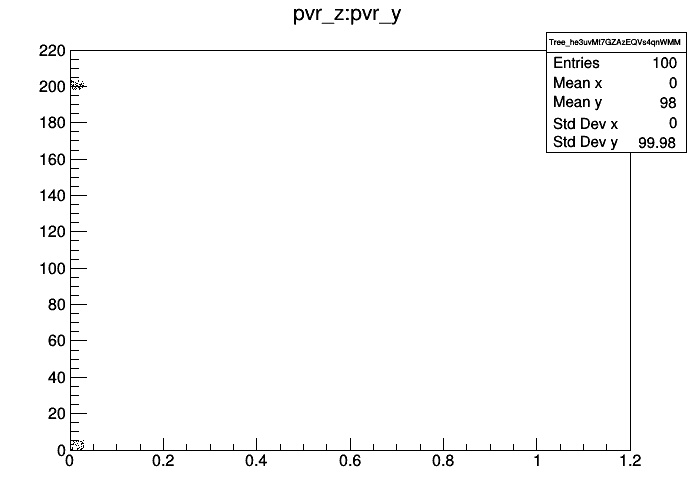

In [21]:
#hist = mytree.Draw('hit_y:hit_x',
hist = mytree.Draw('pvr_y:pvr_z',
                   #selection='0 < hit_x < 40',
                   linecolor='red',
                   fillstyle='.',
                   options='',
                  create_hist = True)
#hist.SetStats(False)

#hist.Title('hit_x')
#hist.GetYAxis().SetTitle('hit_y')

hist

## Plots respecting the tree structure

In [6]:
cv = ROOT.TCanvas('c1','c1',650,450)

#hist_prt_rhoz = ROOT.TH2F("Prt starting positions rho z", "Prt starting positions; z [mm]; rho = sqrt(x^2 + y^2) [mm]; Events", 100, -200, 400, 100, 0, 3.)
hist_prt_rhoz = ROOT.TH2F("Prt starting positions rho z", "Prt starting positions; z [mm]; rho = sqrt(x^2 + y^2) [mm]; Events", 100, -300, 800, 100, 0, 70.)

hist_prt_z = ROOT.TH1F("Prt starting positions z", "Prt starting positions; z [mm]; Events", 100, -300, 800)

hist_prt_eta_mom = ROOT.TH1F("Pseudorapidity of particle momenta", "Pseudorapidity of particle momenta; Pseudorapidity eta; Events", 600, -6, 6)


hist_hit_xy = ROOT.TH2F("Hit positions xy", "Hit positions; x [mm]; y [mm]; Events", 100, -45, 45, 100, -45, 45)
hist_hit_rhoz = ROOT.TH2F("Hit positions rho z", "Hit positions; z [mm]; rho = sqrt(x^2 + y^2) [mm]; Events",  100, -300, 800, 100, 0, 70)

hist_hit_eta = ROOT.TH1F("Pseudorapidity of detector hits", "Pseudorapidity of detector hits; Pseudorapidity eta; Events", 600, -6, 6)


hist_pvr_z = ROOT.TH1F("Pvr z", "Pvr; z [mm]; Events", 100, -300, 800)




In [9]:
print "Starting"
print "e_i :\t                 ",
for e_i, event in enumerate(t):
    #print "t.GetEntry(e_i)", t.GetEntry(e_i)
    #print "event", event
    
    
    #assert (event == t.GetEntry(e_i))
    if (e_i%100==0 ): print "|",
    if (e_i%1000==0 ): print "\t{}  out of  {}k\ne_i :\t".format(e_i/1000., 10 ),
    
    #print len(event.prt_x)
    for prt_i in range(len(event.prt_x)):
        hist_prt_rhoz.Fill(event.prt_z[prt_i], np.sqrt(np.power(event.prt_x[prt_i],2.) + np.power(event.prt_y[prt_i],2.)))
        hist_prt_z.Fill(event.prt_z[prt_i])
        hist_prt_eta_mom.Fill(fun_eta_mom(event.prt_px[prt_i], event.prt_py[prt_i], event.prt_pz[prt_i]))
        
    #len([px for px in event.prt_x])
    #print len(event.hit_x)
    for hit_i in range(len(event.hit_x)):
        hist_hit_xy.Fill(event.hit_x[hit_i], event.hit_y[hit_i])
        hist_hit_rhoz.Fill(event.hit_z[hit_i], np.sqrt(np.power(event.hit_x[hit_i],2.) + np.power(event.hit_y[hit_i],2.)))
        hist_hit_eta.Fill(fun_eta_det(event.hit_x[hit_i], event.hit_y[hit_i], event.hit_z[hit_i]))
        
        
    assert (len(event.pvr_z)==1), "More than 1 pvr in the event"
    for pvr_i in range(len(event.pvr_z)):
        hist_pvr_z.Fill(event.pvr_z[pvr_i])
    #print "before sleep"
    #time.sleep(10)
    

Starting
e_i :	                  | 	0.0  out of  10k
e_i :	

In [16]:
hist_prt_rhoz.SetStats(False)
hist_prt_rhoz.Draw("colz")
cv.SaveAs("plots/prt_rhoz.png")

hist_prt_z.SetStats(False)
hist_prt_z.Draw()
cv.SaveAs("plots/prt_z.png")

hist_prt_eta_mom.SetStats(False)
hist_prt_eta_mom.Draw()
cv.SaveAs("plots/prt_eta_mom.png")


hist_hit_xy.SetStats(False)
hist_hit_xy.Draw("colz")
cv.SaveAs("plots/hit_xy.png")

hist_hit_rhoz.SetStats(False)
hist_hit_rhoz.Draw("colz")
cv.SaveAs("plots/hit_rhoz.png")

hist_hit_eta.SetStats(False)
hist_hit_eta.Draw("colz")
cv.SaveAs("plots/hit_eta.png")


hist_pvr_z.SetStats(False)
hist_pvr_z.Draw()
cv.SaveAs("plots/pvr_z.png")


INFO:ROOT.TCanvas.Print] png file plots/prt_rhoz.png has been created
INFO:ROOT.TCanvas.Print] png file plots/prt_z.png has been created
INFO:ROOT.TCanvas.Print] png file plots/prt_eta_mom.png has been created
INFO:ROOT.TCanvas.Print] png file plots/hit_xy.png has been created
INFO:ROOT.TCanvas.Print] png file plots/hit_rhoz.png has been created
INFO:ROOT.TCanvas.Print] png file plots/hit_eta.png has been created
INFO:ROOT.TCanvas.Print] png file plots/pvr_z.png has been created


## Looking at One event

In [3]:
cv = ROOT.TCanvas('c1','c1',650,450)
#hist_prt_rhoz_example = ROOT.TH2F("Prt starting positions rho z", "Prt starting positions; z [mm]; rho = sqrt(x^2 + y^2) [mm]; Events", 100, -200, 400, 100, 0, 3.)

hist_prt_rhoz_example, hist_hit_xy_example, hist_hit_rhoz_example, hist_hit_zx_example, hist_hit_zy_example, vect_pvr_pos_example = [], [], [], [], [], []

for i in range(6):
    hist_prt_rhoz_example.append(ROOT.TH2F("Prt starting positions rho z example{}".format(i), "Prt starting positions example{}; z [mm]; rho = sqrt(x^2 + y^2) [mm]; Events".format(i), 100, -300, 800, 100, 0, 70.))



    hist_hit_xy_example.append(ROOT.TH2F("Hit positions xy example{}".format(i), "Hit positions example{}; x [mm]; y [mm]; Events".format(i), 100, -45, 45, 100, -45, 45))
    hist_hit_rhoz_example.append(ROOT.TH2F("Hit positions rho z example{}".format(i), "Hit positions example{}; z [mm]; rho = sqrt(x^2 + y^2) [mm]; Events".format(i),  100, -300, 800, 100, 0, 70))
    hist_hit_zx_example.append(ROOT.TH2F("Hit positions zx example{}".format(i), "Hit positions example{}; z [mm]; x [mm]; Events".format(i), 100, -300, 800, 100, -45, 45))
    hist_hit_zy_example.append(ROOT.TH2F("Hit positions zy example{}".format(i), "Hit positions example{}; z [mm]; y [mm]; Events".format(i), 100, -300, 800, 100, -45, 45))

    
    vect_pvr_pos_example.append([-100, -100, -100])


In [4]:



for i in range(6):
    if i==0: event = t.__iter__().next()
    t.GetEntry(i)
    
    print len(event.prt_x)
    for prt_i in range(len(event.prt_x)):
        hist_prt_rhoz_example[i].Fill(event.prt_z[prt_i], np.sqrt(np.power(event.prt_x[prt_i],2.) + np.power(event.prt_y[prt_i],2.)))

    #len([px for px in event.prt_x])
    #print len(event.hit_x)
    for hit_i in range(len(event.hit_x)):
        hist_hit_xy_example[i].Fill(event.hit_x[hit_i], event.hit_y[hit_i])
        hist_hit_rhoz_example[i].Fill(event.hit_z[hit_i], np.sqrt(np.power(event.hit_x[hit_i],2.) + np.power(event.hit_y[hit_i],2.)))
        hist_hit_zx_example[i].Fill(event.hit_z[hit_i], event.hit_x[hit_i])
        hist_hit_zy_example[i].Fill(event.hit_z[hit_i], event.hit_y[hit_i])

    #print "Number of PVs in event : ", len(event.pvr_z)
    assert (len(event.pvr_z)==1), "More than 1 pvr in the event"
    for pvr_i in range(len(event.pvr_z)):
        vect_pvr_pos_example[i]= [event.pvr_x[pvr_i], event.pvr_y[pvr_i], event.pvr_z[pvr_i]]


    #print "before sleep"
    #time.sleep(10)

301
60
48
168
10
146


In [5]:
for i in range(6):

    
    hist_prt_rhoz_example[i].SetStats(False)
    hist_prt_rhoz_example[i].Draw("colz")
    mrkr = ROOT.TMarker(vect_pvr_pos_example[i][2], np.sqrt(np.power(vect_pvr_pos_example[i][0],2.) + np.power(vect_pvr_pos_example[i][1],2.)), 5)
    mrkr.SetMarkerColor(ROOT.kRed)
    mrkr.SetMarkerSize(2)
    #mrkr.SetMarkerStyle(47)
    mrkr.Draw("Red same")
    cv.SaveAs("plots/prt_rhoz_example_{}.png".format(i))

    hist_hit_xy_example[i].SetStats(False)
    hist_hit_xy_example[i].Draw("colz")
    mrkr = ROOT.TMarker(vect_pvr_pos_example[i][0], vect_pvr_pos_example[i][1], 5)
    mrkr.SetMarkerColor(ROOT.kRed)
    mrkr.SetMarkerSize(2)
    mrkr.SetMarkerStyle(47)
    mrkr.Draw("Red same")
    cv.SaveAs("plots/hit_xy_example_{}.png".format(i))

    hist_hit_rhoz_example[i].SetStats(False)
    hist_hit_rhoz_example[i].Draw("colz")
    mrkr = ROOT.TMarker(vect_pvr_pos_example[i][2], np.sqrt(np.power(vect_pvr_pos_example[i][0],2.) + np.power(vect_pvr_pos_example[i][1],2.)), 5)
    mrkr.SetMarkerColor(ROOT.kRed)
    mrkr.SetMarkerSize(2)
    mrkr.SetMarkerStyle(47)
    mrkr.Draw("Red same")
    cv.SaveAs("plots/hit_rhoz_example_{}.png".format(i))
    
    hist_hit_zx_example[i].SetStats(False)
    hist_hit_zx_example[i].Draw("colz")
    mrkr = ROOT.TMarker(vect_pvr_pos_example[i][2], vect_pvr_pos_example[i][0], 5)
    mrkr.SetMarkerColor(ROOT.kRed)
    mrkr.SetMarkerSize(2)
    mrkr.SetMarkerStyle(47)
    mrkr.Draw("Red same")
    cv.SaveAs("plots/hit_zx_example_{}.png".format(i))
    
    hist_hit_zy_example[i].SetStats(False)
    hist_hit_zy_example[i].Draw("colz")
    mrkr = ROOT.TMarker(vect_pvr_pos_example[i][2], vect_pvr_pos_example[i][1], 5)
    mrkr.SetMarkerColor(ROOT.kRed)
    mrkr.SetMarkerSize(2)
    mrkr.SetMarkerStyle(47)
    mrkr.Draw("Red same")
    cv.SaveAs("plots/hit_zy_example_{}.png".format(i))

INFO:ROOT.TCanvas.Print] png file plots/prt_rhoz_example_0.png has been created
INFO:ROOT.TCanvas.Print] png file plots/hit_xy_example_0.png has been created
INFO:ROOT.TCanvas.Print] png file plots/hit_rhoz_example_0.png has been created
INFO:ROOT.TCanvas.Print] png file plots/hit_zx_example_0.png has been created
INFO:ROOT.TCanvas.Print] png file plots/hit_zy_example_0.png has been created
INFO:ROOT.TCanvas.Print] png file plots/prt_rhoz_example_1.png has been created
INFO:ROOT.TCanvas.Print] png file plots/hit_xy_example_1.png has been created
INFO:ROOT.TCanvas.Print] png file plots/hit_rhoz_example_1.png has been created
INFO:ROOT.TCanvas.Print] png file plots/hit_zx_example_1.png has been created
INFO:ROOT.TCanvas.Print] png file plots/hit_zy_example_1.png has been created
INFO:ROOT.TCanvas.Print] png file plots/prt_rhoz_example_2.png has been created
INFO:ROOT.TCanvas.Print] png file plots/hit_xy_example_2.png has been created
INFO:ROOT.TCanvas.Print] png file plots/hit_rhoz_examp

## Producing Binned Data

In [5]:
print "Starting"
print "e_i :\t                 ",

#lin_edges = [np.linspace(-40,40, num=51), np.linspace(-40,40, num=51), np.linspace(-300,800, num=101)]
lin_edges = [np.linspace(-40,40, num=16), np.linspace(-40,40, num=16), np.linspace(-300,800, num=26)]
log_edges = []


for e_i, event in enumerate(t):
    
    
    if (e_i%100==0 ): print "|",
    if (e_i%1000==0 ): print "\t{}  out of  {}k\ne_i :\t".format(e_i/1000., 10 ),
    #if (e_i > 4): break
    
    histo3D_bin_contents, edges = np.histogramdd(np.array([event.hit_x, event.hit_y, event.hit_z]).T, bins= lin_edges)
    #print histo3D_bin_contents.shape
    
    if e_i == 0:
        features_binned = np.array([histo3D_bin_contents])
        #print features_binned.shape
        results = np.array([event.pvr_z])
    else:
        features_binned = np.append(features_binned, [histo3D_bin_contents], axis=0)
        #print features_binned.shape 
        results = np.append(results, [event.pvr_z])

print features_binned.shape, results.shape

Starting
e_i :	                  | 	0.0  out of  10k
e_i :	| | | | | | | | | | 	1.0  out of  10k
e_i :	| | | | | | | | | | 	2.0  out of  10k
e_i :	| | | | | | | | | | 	3.0  out of  10k
e_i :	| | | | | | | | | | 	4.0  out of  10k
e_i :	| | | | | | | | | | 	5.0  out of  10k
e_i :	| | | | | | | | | | 	6.0  out of  10k
e_i :	| | | | | | | | | | 	7.0  out of  10k
e_i :	| | | | | | | | | | 	8.0  out of  10k
e_i :	| | | | | | | | | | 	9.0  out of  10k
e_i :	| | | | | | | | | (10000, 15, 15, 25) (10000,)


In [6]:
#np.savetxt("features_binned2_easy.csv", features_binned)
#np.savetxt("results2_easy.csv", results)
np.save("features_binned2_easy", features_binned)
np.save("results2_easy", results)

## Producing SPARSE Binned Data

In [4]:
with open('features_binned_sparse_easy.txt', 'w') as f_out:
    print "Starting"
    print "e_i :\t                 ",

    #lin_edges = [np.linspace(-40,40, num=51), np.linspace(-40,40, num=51), np.linspace(-300,800, num=101)]
    lin_edges = [np.linspace(-40,40, num=16), np.linspace(-40,40, num=16), np.linspace(-300,800, num=26)]
    log_edges = []


    for e_i, event in enumerate(t):


        if (e_i%100==0 ): print "|",
        if (e_i%1000==0 ): print "\t{}  out of  {}k\ne_i :\t".format(e_i/1000., 10 ),
        #if (e_i > 9): break

        histo3D_bin_contents, edges = np.histogramdd(np.array([event.hit_x, event.hit_y, event.hit_z]).T, bins= lin_edges)
        #print histo3D_bin_contents.shape
        #print histo3D_bin_contents

        shape_3D =  histo3D_bin_contents.shape
        #Sadly can't have a 3D sparse matrix. Need to reshape temporarily
        histo3D_bin_contents_sparse = sparse.csr_matrix(histo3D_bin_contents.reshape(shape_3D[0]*shape_3D[1], shape_3D[2]))
        #print histo3D_bin_contents_sparse
        #print "Now Data"
        #print histo3D_bin_contents_sparse.data.shape
        #print histo3D_bin_contents_sparse.indices.shape
        #print histo3D_bin_contents_sparse.indptr.shape
        
        #sparse2 = sparse.csr_matrix((histo3D_bin_contents_sparse.data, histo3D_bin_contents_sparse.indices, histo3D_bin_contents_sparse.indptr), shape=(shape_3D[0]*shape_3D[1], shape_3D[2]))
        #print np.all(sparse2 == histo3D_bin_contents_sparse)
                                    
        
        js = json.dumps(histo3D_bin_contents_sparse.data.tolist()) + "\t"
        js += json.dumps(histo3D_bin_contents_sparse.indices.tolist()) + "\t"
        js += json.dumps(histo3D_bin_contents_sparse.indptr.tolist()) + "\t"
        js += json.dumps(encode(np.array(event.pvr_z)).tolist())
        #print "js : ", js
        f_out.write(js+"\n")



Starting
e_i :	                  | 	0.0  out of  10k
e_i :	| | | | | | | | | | 	1.0  out of  10k
e_i :	| | | | | | | | | | 	2.0  out of  10k
e_i :	| | | | | | | | | | 	3.0  out of  10k
e_i :	| | | | | | | | | | 	4.0  out of  10k
e_i :	| | | | | | | | | | 	5.0  out of  10k
e_i :	| | | | | | | | | | 	6.0  out of  10k
e_i :	| | | | | | | | | | 	7.0  out of  10k
e_i :	| | | | | | | | | | 	8.0  out of  10k
e_i :	| | | | | | | | | | 	9.0  out of  10k
e_i :	| | | | | | | | |


## Producing Fixind number of hits Data

In [7]:
max_nu_hits = 0

for e_i, event in enumerate(t):
    len_hits = len(event.hit_x)
    if len_hits > max_nu_hits: max_nu_hits = len_hits
        
print max_nu_hits

3344


In [8]:
print "Starting"
print "e_i :\t                 ",



for e_i, event in enumerate(t):
    
    
    if (e_i%100==0 ): print "|",
    if (e_i%1000==0 ): print "\t{}  out of  {}k\ne_i :\t".format(e_i/1000., 10 ),
    #if (e_i > 200): break
    
    feature_contents = np.array([event.hit_x, event.hit_y, event.hit_z]).T
    #print feature_contents.shape
    feature_contents_rho = np.sqrt(np.square(feature_contents[:,0])+np.square(feature_contents[:,1]))
    #print "rho : ", feature_contents_rho.shape
    feature_contents = feature_contents[feature_contents_rho.argsort()]
    
    feature_contents_cut = np.zeros([1000,3])
    #feature_contents_cut = np.zeros([max_nu_hits,3])
    _l = min(1000, feature_contents.shape[0])
    feature_contents_cut[:_l, :] = feature_contents[:_l,:]  #padding or truncating. Whatever is necessary
    
    #print "feature_contents_cut : ", feature_contents_cut
    
    
    if e_i == 0:
        features_fixed_nu_hits = np.array([feature_contents_cut])
        results = np.array([event.pvr_z])
    else:
        features_fixed_nu_hits = np.append(features_fixed_nu_hits, [feature_contents_cut], axis=0)
        results = np.append(results, [event.pvr_z])

print features_binned.shape, results.shape

Starting
e_i :	                  | 	0.0  out of  10k
e_i :	| | | | | | | | | | 	1.0  out of  10k
e_i :	| | | | | | | | | | 	2.0  out of  10k
e_i :	| | | | | | | | | | 	3.0  out of  10k
e_i :	| | | | | | | | | | 	4.0  out of  10k
e_i :	| | | | | | | | | | 	5.0  out of  10k
e_i :	| | | | | | (5684, 15, 15, 25) (5684,)


In [9]:
#np.savetxt("features_fixed_nu_hits2_easy.csv", features_fixed_nu_hits)
#np.savetxt("results2_easy.csv", results)
np.save("features_fixed_nu_hits2_easy", features_fixed_nu_hits)
np.save("results2_easy", results)

## Producing TOTAL number of hits Data

In [33]:
with open('features_total_nu_hits2_easy.txt', 'w') as f_out:
    #f = open('features_total_nu_hits2_easy.txt', 'w')
    for e_i, event in enumerate(t):


        if (e_i%100==0 ): print "|",
        if (e_i%1000==0 ): print "\t{}  out of  {}k\ne_i :\t".format(e_i/1000., 10 ),
        #if (e_i > 3): break

        feature_contents = np.array([event.hit_x, event.hit_y, event.hit_z]).T
        #print feature_contents.shape
        feature_contents_rho = np.sqrt(np.square(feature_contents[:,0])+np.square(feature_contents[:,1]))
        #print "rho : ", feature_contents_rho.shape
        feature_contents = feature_contents[feature_contents_rho.argsort()]


        #print "feature_contents_cut : ", feature_contents_cut

        #print feature_contents[0,:]
        js = json.dumps(feature_contents.tolist())
        #print "js : ", js
        f_out.write(js+"\n")


        if e_i == 0:
            #features_total_nu_hits = np.array([feature_contents_cut])
            results = np.array([event.pvr_z])
        else:
            #features_total_nu_hits = np.append(features_fixed_nu_hits, [feature_contents_cut], axis=0)
            results = np.append(results, [event.pvr_z])





ERROR:root] Internal Python error in the inspect module.
Below is the traceback from this internal error.

INFO:root] 
Unfortunately, your original traceback can not be constructed.



Traceback (most recent call last):
  File "/usr/local/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1132, in get_records
  File "/usr/local/lib/python2.7/site-packages/IPython/core/ultratb.py", line 313, in wrapped
  File "/usr/local/lib/python2.7/site-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
  File "/usr/local/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/inspect.py", line 1051, in getinnerframes
  File "/usr/local/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/inspect.py", line 1011, in getframeinfo
  File "/usr/local/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/inspect.py", line 453, in getsourcefile
  File "/usr/local/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/inspect.py", line 482, in getmodule
  File "/usr/local/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/inspect.py", line 466, in getab

IndexError: string index out of range

In [ ]:
#np.savetxt("features_fixed_nu_hits2_easy.csv", features_fixed_nu_hits)
#np.savetxt("results2_easy.csv", results)
#np.savetxt("features_total_nu_hits2_easy.csv", features_total_nu_hits)
np.save("results2_easy", results)